In [1]:
import numpy as np
import matplotlib.pyplot as plt


def standarize(x):
    x_mean=x.mean()#平均
    std=x.std() #標準偏差
    return (x-x_mean)/std#標準化

def create_matrix(x_std):# tX*w
    return np.vstack([np.ones(x_std.size),
    x_std,
    x_std**2
    ]).T #.Tが転置

def matrix_f(matrix_x,parameter):#a1*b1+12*b2+a3*b3
    return np.dot(matrix_x,parameter)#numpy.dotは内積（一次）、行列積（多次元）

def matrix_E(matrix_x,y,parameter):#parameterはw0,w1,w2
    return 0.5*np.sum((y-matrix_f(matrix_x,parameter))**2)

def polynomial_regression(matrix_x,y):
    parameter=np.random.randint(0,50,3)
    LNR=1e-3#学習率
    defference=1
    count=1#更新回数
    err_before=matrix_E(matrix_x,y,parameter)
    log="({}) parameter:{} error :{:.4f}"
    while defference>1e-2:
        #w0,w1,w2を更新する
        parameter=parameter-LNR*np.dot(matrix_f(matrix_x,parameter)-y,matrix_x)
        err_after=matrix_E(matrix_x,y,parameter)
        defference=err_before-err_after
        err_before=err_after
        if count==1 or count%100==0:
            print(log.format(count,parameter,defference))
        count+=1
    print(log.format(count,parameter,defference))
    return parameter




In [2]:
data=np.loadtxt("sales.csv",dtype="int",delimiter=",",skiprows=1)
x=data[:,0]
y=data[:,1]
x_std=standarize(x)
matrix_x=create_matrix(x_std)
parameter=polynomial_regression(matrix_x,y)


(1) parameter:[29.001      18.31896272 62.36377805] error :1263693.9921
(100) parameter:[840.6567314  261.95662666 284.412027  ] error :14725.2336
(200) parameter:[1060.45304839  286.93876837  162.03634848] error :2528.3077
(300) parameter:[1152.93295048  285.57690433  108.98899819] error :458.0919
(400) parameter:[1192.2931107   283.39613824   86.34013261] error :83.4380
(500) parameter:[1209.08038017  282.25303961   76.67127488] error :15.2054
(600) parameter:[1216.24482365  281.73691646   72.54361941] error :2.7711
(700) parameter:[1219.30306403  281.51285156   70.78151474] error :0.5050
(800) parameter:[1220.60859666  281.416703     70.02926859] error :0.0920
(900) parameter:[1221.16592641  281.37559137   69.70813315] error :0.0168
(932) parameter:[1221.26221269  281.36848575   69.65265252] error :0.0099


<function matplotlib.pyplot.show(*args, **kw)>

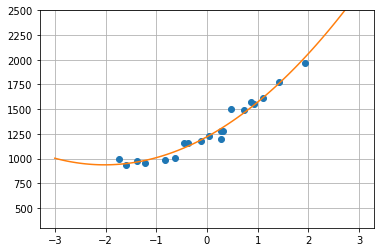

In [3]:
x_axis=np.linspace(start=-3,stop=3,num=100)
plt.ylim(300,2500)
plt.plot(x_std,y,'o')
plt.plot(x_axis,matrix_f(create_matrix(x_axis),parameter))
plt.grid(True)
plt.show